<a href="https://colab.research.google.com/github/KindOrca/ds-section1-sprint1-new/blob/main/n112a_EDA(2)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 2*

---

# 📝 Assignment

# 1. 일원량분석(Univariate Exploration)

- Titanic 데이터셋을 불러옵니다.

- `Survived`, `Pclass`, `Sex`, `Age`, `Fare`, `Embarked` column만 사용합니다.
  - `Survived` : 생존여부
  - `Pclass` : 티켓 등급
  - `Sex` : 성별
  - `Age` : 나이
  - `Fare` : 티켓 금액
  - `Embarked` : 탑승 항구 

- Continuous Variable에 대하여 시각화를 통해 데이터 분포를 살펴봅니다. 

- Categorical Variable에 대하여 시각화를 통해 데이터 분포를 살펴봅니다. 

### Continuous variables
- Histogram을 통해 다음 Countinuous variable의 분포를 확인해 보세요. 
  - `Age`
  - `Fare` 
- `Age` column을 histogram으로 나타낼 때, `np.arange(0, df.Age.max()+bin_size, bin_size)` 에서 bin의 개수가 8이 되도록 bin_size 값을 설정하여 시각화해 보세요. 

In [82]:
import pandas as pd
import numpy as np
from google.colab import files
file = files.upload()

Saving titanic.csv to titanic (1).csv


In [83]:
# Titanic 데이터셋 불러오기
df = pd.read_csv('titanic.csv')
df
# Survived, Pclass, Sex, Age, Fare, Embarked column만 사용
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


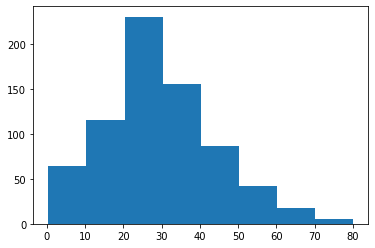

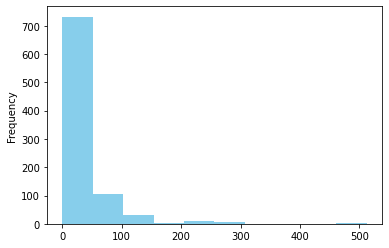

In [84]:
import matplotlib.pyplot as plt
# Histogram을 통해 다음 Continuous variable의 분포 확인
# Age
Age_columns = np.arange(0, df.Age.max()+10, 10)

# Age 결측치 제거
df_age = df['Age'].dropna(axis = 0)

# Age histogram으로 나타내기
n, bins, patches = plt.hist(df_age, bins = 8)
plt.show()
# Fare
df_fare = df['Fare'].dropna(axis = 0)

# Fare histogram으로 나타내기
df_fare.plot.hist(facecolor = 'skyblue')
plt.show()

### Categorical Variables
- matplotplib이나 Seaborn 라이브러리의 Pie plot 또는 Bar plot을 사용하여 다음 Categorical variable의 분포를 확인해 보세요. 
  - `Survived`
  - `Pclass`
  - `Sex`
  - `Embarked`

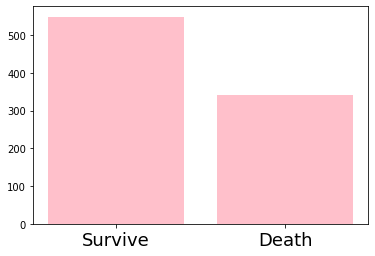

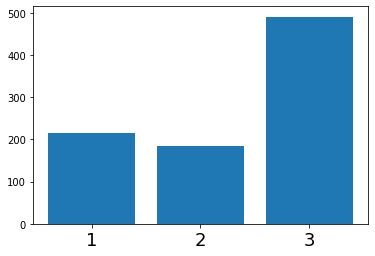

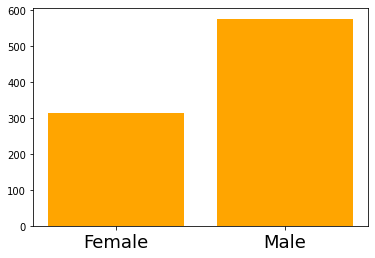

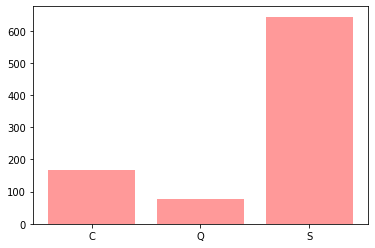

In [85]:
# Survived
df_survived = df['Survived'].dropna(axis = 0)
df_survived = df.groupby('Survived')['Survived'].count()

label = ['Survive', 'Death']
index = np.arange(len(label))

plt.bar(index, df_survived, color = 'pink')
plt.xticks(index, label, fontsize = 18)
plt.show()

# Pclass
df_Pclass = df['Pclass'].dropna(axis = 0)
df_Pclass = df.groupby('Pclass')['Pclass'].count()

label = [1,2,3]
index = np.arange(len(label))

plt.bar(index, df_Pclass)
plt.xticks(index, label, fontsize = 18)
plt.show()

# Sex
df_Sex = df['Sex'].dropna(axis = 0)
df_Sex = df.groupby('Sex').Sex.count()

label = ['Female','Male']
index = np.arange(len(label))

plt.bar(index, df_Sex, color = 'orange')
plt.xticks(index, label, fontsize = 18)
plt.show()

# Embarked
df_Embarked = df['Embarked'].dropna(axis = 0)
df_Embarked = df.groupby('Embarked').Embarked.count()

label = ['C','Q','S']
index = np.arange(3)

plt.bar(index, df_Embarked, color = 'red', alpha = 0.4)
plt.xticks(index, label)
plt.show()

#2. 이원량분석(Bivariate Exploration)

- target인 `Survived`와 feature들 간의 상관관계를 파악합니다. 
  - 데이터 타입에 따라 적절한 시각화를 구현해 보세요. 

### Categorical - Continuous
matplotlib이나 seaborn 라이브러리의 Violin Plot 또는 Box Plot을 사용하여 다음 두 변수의 상관관계를 살펴보세요.  
  - `Survived` & `Age`
  - `Survived` & `Fare`

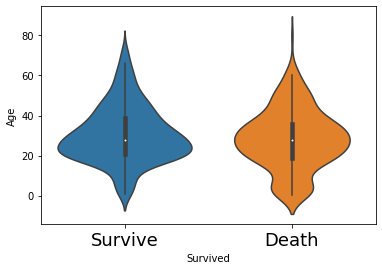

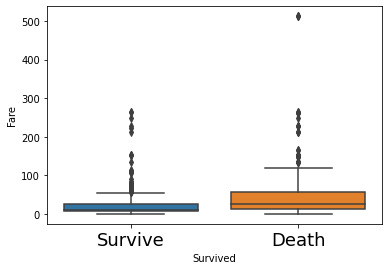

In [86]:
import seaborn as sns
df.dropna(axis = 0)
sns.violinplot(x='Survived', y='Age', data=df);
label = ['Survive', 'Death']
index = np.arange(len(label))
plt.xticks(index, label, fontsize = 18)
plt.show()
sns.boxplot(x='Survived', y='Fare', data=df)
plt.xticks(index, label, fontsize = 18)
plt.show()

### Categorical - Categorical 
- `.crosstab()`을 활용하여 categorical variable과 `Survived`의 빈도를 구합니다. </br>
  https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- seaborn 라이브러리의 Count plot을 사용하여 다음 두 변수의 빈도(frequency)를 비교해 보세요. 
  - `Survived` & `Sex`
  - `Survived` & `Pclass`
  - `Survived` & `Embarked`

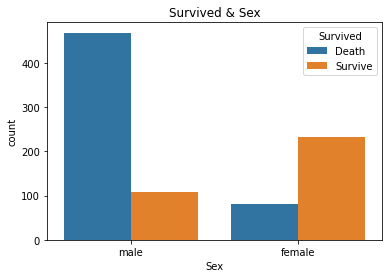

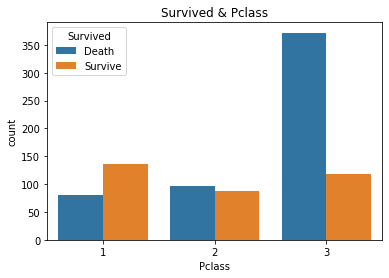

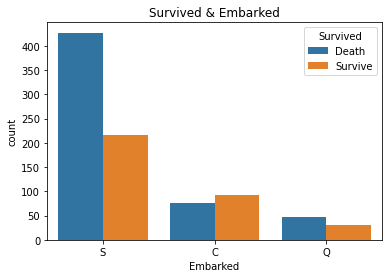

In [90]:
df['Survived'] = df['Survived'].replace({'0':'Death','1':'Survive'})
sns.countplot(x= 'Sex', hue = 'Survived',data = df)
plt.title('Survived & Sex')
plt.show()
sns.countplot(x= 'Pclass', hue = 'Survived',data = df)
plt.title('Survived & Pclass')
plt.show()
sns.countplot(x= 'Embarked', hue = 'Survived',data = df)
plt.title('Survived & Embarked')
plt.show()

# 🔥 도전과제 
- 위에서 진행한 시각화를 통해 분석한 바를 서술하세요. 